In [1]:
%cd "/content/drive/MyDrive/Image Classification/CLS - tensorflow 2"

/content/drive/MyDrive/Image Classification/CLS - tensorflow 2


In [4]:
import cv2
import numbers
import collections.abc as collections
import numpy as np
import math
import torch
import torchvision
import torchvision.transforms.functional as TF
from visualizer import *
# from augmenter.base_transform import *
from utils.someones import *
# from augmenter.base_transform import BaseTransform, BaseRandomTransform, ComposeTransform
from utils.auxiliary_processing import random_range, is_numpy_image
import random
from augmenter.geometric import *
from augmenter.photometric import *
import copy
import importlib

KeyboardInterrupt: 

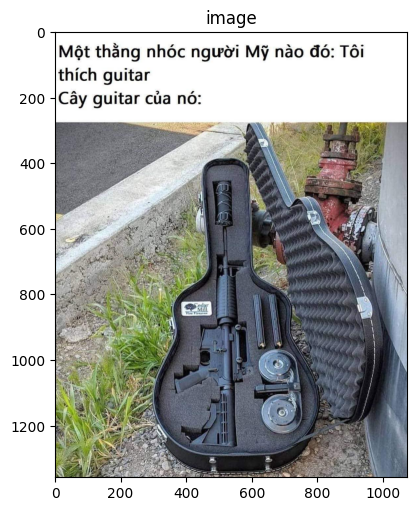

In [ ]:
img_path = "/content/drive/MyDrive/Datasets/test.png"
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
orin_image = image.copy()
visual_image([image], ['image'])


In [ ]:
list_transform = [
    ResizeKeepRatio(224),
    CenterCrop(224),
    RandomHorizontalFlip(),
    ColorJitter(1.4, 1.4, 1.4),
    RandomErasing()
]

In [ ]:
class ComposeTransform:
    def __init__(self, transform):
        self.transform = transform

    def __call__(self, images):
        for t in self.transform:
            print(t.__class__.__name__)
            if isinstance(images, (tuple, list)):
                images = [t(img) for img in images]
            else:
                images = t(images)
        return images

ResizeKeepRatio
CenterCrop
RandomHorizontalFlip
ColorJitter
RandomErasing
< shape: (224, 224, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 164.851 >


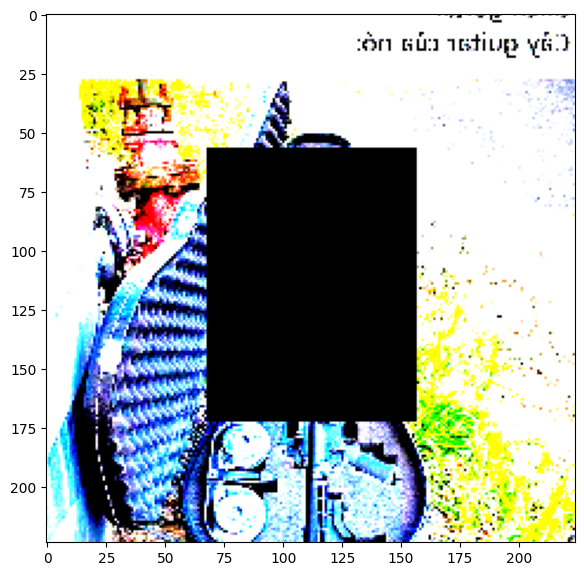

In [ ]:
aug = ComposeTransform(list_transform)
new_image = aug([image])[0]
visual_image([new_image], [''], size=(15, 15))
tensor_value_info(new_image)

In [ ]:
class RandomApply:
    def __init__(self, transform, prob=0.5):
        self.transform = transform
        self.prob      = prob

    def __call__(self, images):
        if self.prob < random.random():
            return images

        for t in self.transform:
            print(t.__class__.__name__)
            if isinstance(images, (tuple, list)):
                images = [t(img) for img in images]
            else:
                images = t(images)
        return images

< shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 141.262 >


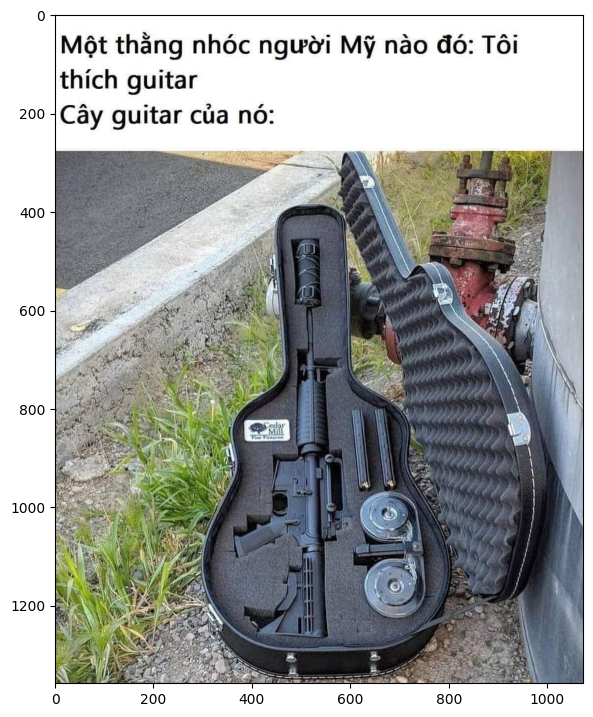

In [ ]:
aug = RandomApply(list_transform)
new_image = aug([image])[0]
visual_image([new_image], [''], size=(15, 15))
tensor_value_info(new_image)

In [ ]:
class RandomOrder:
    def __init__(self, transforms):
        self.transforms = transforms
        print('transforms list:', self.transforms)

    def __call__(self, images):
        order = list(range(len(self.transforms)))
        random.shuffle(order)

        for i in order:
            print(self.transforms[i].__class__.__name__)
            if isinstance(images, (tuple, list)):
                images = [self.transforms[i](img) for img in images]
            else:
                images = self.transforms[i](images)
        return images

transforms list: [<augmenter.geometric.resize_keep_ratio.ResizeKeepRatio object at 0x7ee8e3523640>, <augmenter.geometric.crop.center_crop.CenterCrop object at 0x7ee8e3520970>, <augmenter.geometric.flip.RandomHorizontalFlip object at 0x7ee8e3522f20>, <augmenter.photometric.colorjitter.ColorJitter object at 0x7ee8e3521c30>, <augmenter.photometric.arithmetic.erasing.RandomErasing object at 0x7ee8e3520f70>]
RandomHorizontalFlip
ResizeKeepRatio
ColorJitter
CenterCrop
RandomErasing
< shape: (224, 224, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 92.671 >


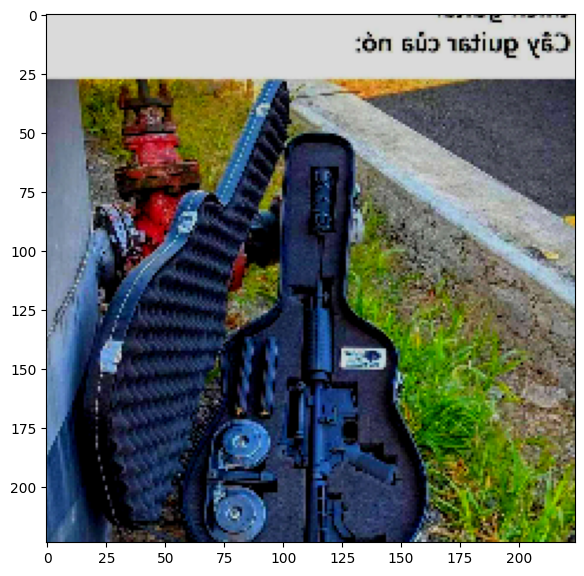

In [ ]:
aug = RandomOrder(list_transform)
new_image = aug([image])[0]
visual_image([new_image], [''], size=(15, 15))
tensor_value_info(new_image)

In [ ]:
class RandomChoice:
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, images):
        t = random.choice(self.transforms)
        # print(t.__class__.__name__)
        if isinstance(images, (tuple, list)):
            images = [t(img) for img in images]
        else:
            images = t(images)
        return images

RandomHorizontalFlip
< shape: (1358, 1074, 3) dtype: uint8 min: 0.000 max: 255.000 mean: 141.262 >


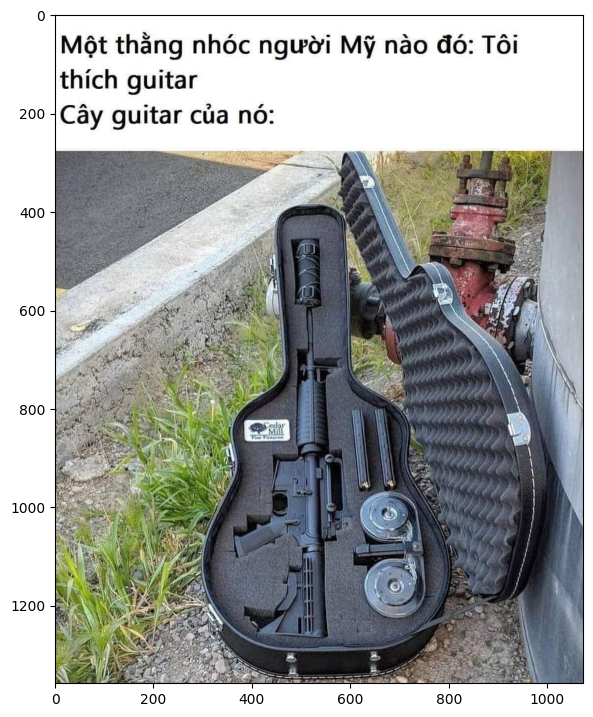

In [ ]:
aug = RandomChoice(list_transform)
new_image = aug([image])[0]
visual_image([new_image], [''], size=(15, 15))
tensor_value_info(new_image)

In [ ]:
list_transform2 = [
    ResizeKeepRatio(224),
    CenterCrop(224),
    RandomOrder([
        RandomOrder([
            RandomOrder([
                RandomHorizontalFlip(),
                ColorJitter(1.4, 1.4, 1.4),
            ])
        ])
    ])
]

transforms list: [<augmenter.geometric.flip.RandomHorizontalFlip object at 0x7ee8e0c47eb0>, <augmenter.photometric.colorjitter.ColorJitter object at 0x7ee8e0c44a30>]
transforms list: [<__main__.RandomOrder object at 0x7ee8e0c39b10>]
transforms list: [<__main__.RandomOrder object at 0x7ee8e0c38d30>]


In [ ]:
list_transform2

ResizeKeepRatio
CenterCrop
RandomOrder
RandomOrder
RandomOrder
ColorJitter
RandomHorizontalFlip
< shape: (224, 224, 3) dtype: uint8 min: 0.000 max: 147.000 mean: 71.536 >


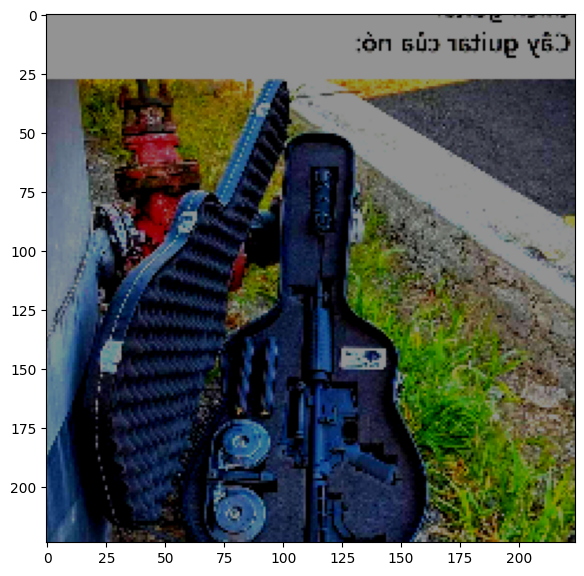

In [ ]:
aug = ComposeTransform(list_transform2)
new_image = aug([image])[0]
visual_image([new_image], [''], size=(15, 15))
tensor_value_info(new_image)

In [3]:
aug_list = [
    {'RandomHorizontalFlip': None},
    {'RandomOrder':
        [{'CenterCrop': {'size': 224}},
         {'RandomOrder':
            [{'RandomOrder':
                [{'Posterize': {'bits': 4}}, {'Rotation': {'degrees': 30}}, {'Rotation': {'degrees': 30}}, {'Rotation': {'degrees': 30}}, {'Rotation': {'degrees': 30}}]}]},
         {'CenterCrop': {'size': 224}}

         ]},
        ]

In [ ]:
als = ['RandomHorizontalFlip', 'RandomOrder', 'Posterize', 'CenterCrop', 'Rotation']

In [ ]:
def extract_paths(tree, path=None, lst=[]):
    if path is None:
        path = []

    if isinstance(tree, list):
        # If the current tree node is a list, traverse each element
        for index, item in enumerate(tree):
            extract_paths(item, path + [index])
    elif isinstance(tree, dict):
        # If the current tree node is a dictionary, traverse each key-value pair
        for key, value in tree.items():
            # If the value is a dictionary or list, continue traversing
            if value:
                if isinstance(value, (dict, list)):
                    nv = len(value)
                else:
                    nv = 0
            else:
                nv = -1

            if isinstance(value, (dict, list)):
                extract_paths(value, path + [key])
            else:
                # If it’s a leaf node, print or store the path
                if key not in als:
                    left_lst = {'path': path, 'value': tree}
                    if left_lst not in lst:
                        lst.append(left_lst)
                else:
                    lst.append({'path': path + [key], 'value': value})
    return lst

# Your tree structure
aug_list = [
    {'RandomHorizontalFlip': None},
    {'RandomOrder':
        [{'CenterCrop': {'size': 224}},
         {'RandomOrder':
            [{'RandomOrder':
                [{'Posterize': {'bits': 4, 'test': 3}}, {'Rotation': {'degrees': 30}}, {'Rotation': {'degrees': 30}}, {'Rotation': {'degrees': 30}}, {'Rotation': {'degrees': 30}}]}]},
         {'CenterCrop': {'size': 224}}
         ]},
        ]

# Call the function
a = extract_paths(aug_list)


In [1]:
%cd "/content/drive/MyDrive/Image Classification/CLS - tensorflow 2"

/content/drive/MyDrive/Image Classification/CLS - tensorflow 2


In [2]:
from augmenter import *

In [3]:
aug_list = [
    {'RandomHorizontalFlip': None},
    {'RandomOrder':
        [{'CenterCrop': {'size': 224}},
         {'RandomOrder':
            [{'RandomOrder':
                [{'Posterize': {'bits': 4}}, {'Rotation': {'degrees': 30}}, {'Rotation': {'degrees': 30}}, {'Rotation': {'degrees': 30}}, {'Rotation': {'degrees': 30}}]}]},
         {'CenterCrop': {'size': 224}}

         ]},
        ]

def parse_augment_config(aug_list):
    parsed = []
    for item in aug_list:
        for transform_name, params in item.items():
            transform_instance = eval(transform_name)
            if transform_instance is None:
                raise ValueError(f"Unknown transform: {transform_name}")
            if params is None:
                # For transforms without parameters
                parsed.append(transform_instance())
            elif isinstance(params, list):
                # For transforms that take a list (e.g., RandomOrder)
                nested = parse_augment_config(params)
                parsed.append(transform_instance(nested))
            elif isinstance(params, dict):
                # For transforms with parameters
                parsed.append(transform_instance(**params))
            else:
                raise ValueError(f"Invalid parameters for transform {transform_name}")
    return parsed

parsed_transforms = parse_augment_config(aug_list)
print(parsed_transforms)

transforms: [<augmenter.photometric.arithmetic.posterize.Posterize object at 0x7ec3530766b0>, <augmenter.geometric.rotate.Rotation object at 0x7ec3530775e0>, <augmenter.geometric.rotate.Rotation object at 0x7ec353077580>, <augmenter.geometric.rotate.Rotation object at 0x7ec353077520>, <augmenter.geometric.rotate.Rotation object at 0x7ec3530774c0>]
transforms: [<augmenter.meta_transform.RandomOrder object at 0x7ec353077fa0>]
transforms: [<augmenter.geometric.crop.center_crop.CenterCrop object at 0x7ec3530748e0>, <augmenter.meta_transform.RandomOrder object at 0x7ec353076680>, <augmenter.geometric.crop.center_crop.CenterCrop object at 0x7ec353074580>]
[<augmenter.geometric.flip.RandomHorizontalFlip object at 0x7ec353074970>, <augmenter.meta_transform.RandomOrder object at 0x7ec353077c70>]
